### Bước 1: Chuẩn bị các ảnh thuộc các chủ đề sau: xe hơi, chó, mèo, cây cối. Mỗi chủ đề lấy 3-4 hình.

In [ ]:
!mkdir data_train
%cd data_train

# Xe hơi (0)
!wget https://icdn.dantri.com.vn/k:402ad9bfd8/2016/02/15/1-1455519086412/12-mau-xe-hoi-gia-dinh-4-cua-tot-nhat-tren-the-gioi.jpg -O car1.jpg
!wget https://lucar.vn/public/uploads/images/tin-tuc/cac-hang-xe-hoi-noi-tieng-cua-Duc-1.jpg -O car2.jpg
!wget https://ggstorage.oxii.vn/images/oxii-2019-3-12/728x436/mua-xe.jpg -O car3.jpg
!wget https://zestech.vn/wp-content/uploads/2020/07/xe-h%C6%A1i-x%E1%BB%8Bn-e1594202857997.jpg -O car4.jpg

# Chó (1)
!wget https://image-us.24h.com.vn/upload/1-2021/images/2021-03-22//1616407139-cho-1.jpg -O dog1.jpg
!wget https://www.2thucung.com/wp-content/uploads/2021/01/cho-golden.jpg -O dog2.jpg
!wget https://zoipet.com/wp-content/uploads/2020/03/cham-soc-cho-shiba.jpg -O dog3.jpg
!wget https://afamilycdn.com/150157425591193600/2020/7/7/shiba-cheems-meme-dog-balltze-4-1-1594089369474789804369.jpg -O dog4.jpg

# Mèo (2)
!wget https://top8tphcm.com/wp-content/uploads/2021/07/meo-canh.jpg -O cat1.jpg
!wget https://petmaster.vn/petroom/wp-content/uploads/2020/04/meo-canh-5.jpg -O cat2.jpg
!wget https://zoipet.com/wp-content/uploads/2020/06/meo-muop.jpg -O cat3.jpg
!wget https://i.kym-cdn.com/entries/icons/original/000/032/100/cover4.jpg -O cat4.jpg

# Cây cối (3)
!wget https://photo-cms-baonghean.zadn.vn/cw607/Uploaded/2021/nzyrvtpymyl/2020_05_22/bna_26370447_2252020.jpg -O tree1.jpg
!wget https://www.thuocdantoc.org/wp-content/uploads/2019/10/long-nao.2.jpg -O tree2.jpg
!wget https://waste4change.com/blog/wp-content/uploads/niko-photos-tGTVxeOr_Rs-unsplash-1024x683.jpg -O tree3.jpg
!wget https://www.thuocdantoc.org/wp-content/uploads/2019/10/cay-si.jpg -O tree4.jpg

%cd ..

# Ảnh truy vấn
!wget https://i.pinimg.com/474x/f5/37/85/f53785ab401e765c942f3ca67936d1a5.jpg -O test.jpg

### Bước 2: Load tất cả các ảnh.

In [ ]:
import os
import numpy
from keras.preprocessing import image

list_img = os.listdir("./data_train")
list_img.sort()
img_train_path = []
img_train = []
img_train_label = ['car', 'car', 'car', 'car',
                   'cat', 'cat', 'cat', 'cat',
                   'dog', 'dog', 'dog', 'dog',
                   'tree', 'tree', 'tree', 'tree']
img_train_label = numpy.reshape(img_train_label, (-1, 1)).ravel()

for file_ in list_img:
    path = "/content/data_train/" + file_
    img_train_path.append(path)
    img = image.load_img(path, target_size=(224, 224))
    img_train.append(img)

### Bước 3: Rút trích đặc trưng từ pre-trained model VGG16 (Thư viện Keras).

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input

model = VGG16(include_top=False)

img_train_feature = []
for img in img_train:
    img_arr = image.img_to_array(img)
    img_arr = numpy.expand_dims(img_arr, axis=0)
    img_arr = preprocess_input(img_arr)
    feature = model.predict(img_arr)
    feature = feature.flatten().reshape(-1, 1).T
    img_train_feature.append(feature)

img_train_feature = numpy.reshape(img_train_feature, (16, -1))

### Bước 4: Đọc ảnh truy vấn.

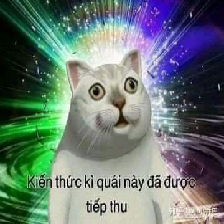

In [ ]:
img_test_path = "./test.jpg"
img_test = image.load_img(img_test_path, target_size=(224, 224))
img_test

### Bước 5: Rút trích đặc trưng ảnh truy vấn.

In [ ]:
img_test_arr = image.img_to_array(img_test)
img_test_arr = numpy.expand_dims(img_test_arr, axis=0)
img_test_arr = preprocess_input(img_test_arr)
img_test_feature = model.predict(img_test_arr)
img_test_feature = img_test_feature.flatten().reshape(-1, 1).T

### Bước 6: Lấy đặc trưng truy vấn để tìm top K=3 đặc trưng gần nhất (KNN).

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn = knn.fit(img_train_feature, img_train_label)

topK = knn.kneighbors(img_test_feature, n_neighbors=3)

### Bước 7: Show top K ảnh tương ứng với các đặc trưng tìm được ở bước 6.

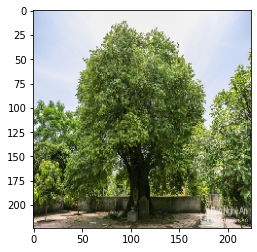

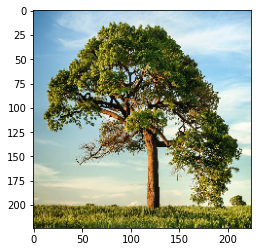

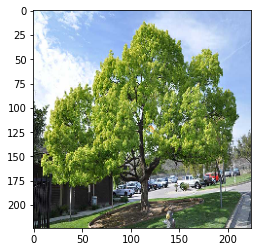

In [ ]:
import matplotlib.pyplot as plt

for i in range(3):
    index = topK[1][0][i]
    plt.imshow(img_train[index])
    plt.show()